### Dendrogram

##### scipy.cluster.hierarchy
- 계층적 군집화(Hierarchical Clustering)는 Tree기반의 모델이다.
- 2차원 데이터를 통해 군집화를 시각화할 수 있기 때문에, 다차원 데이터에서 2개의 feature를 선택하거나 차원 축소화를 진행한다.
- 데이터 사이의 거리를 구할 때 거리 계산 방법으로서, 중심연결, 단일연결, 완전연결, 평균연결, 와드연결 등이 있고, 하이퍼 파라미터로 선택이 가능하다.
<img src="./images/dendrogram.png" width="400" style="margin-left: 0">

##### sklearn.cluster.AgglomerativeClustering
- 계층적 군집을 반복하여 만들고 모든 데이터 포인트들이 하나의 포인트를 가진 클러스터에서 마지막 클러스터까지 이동하여 최종 군집이 형성된다.
- 최초의 중앙점으로 부터 포인트들이 증가해가며 군집이 커지는 모양을 가진다.
- 데이터 사이의 거리를 구할 때 거리 계산 방법으로서, 중심연결, 단일연결, 완전연결, 평균연결, 와드연결 등이 있고, 하이퍼 파라미터로 선택이 가능하다.
<img src="./images/agglomerative_clustering.gif" width="400" style="margin-left: 0">

In [1]:
import pandas as pd

mall_df = pd.read_csv('./datasets/mall.csv')
mall_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
mall_df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [3]:
mall_df.duplicated().sum()

0

In [4]:
mall_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [5]:
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
from sklearn.preprocessing import StandardScaler

scaled_mall_df = StandardScaler().fit_transform(mall_df.iloc[:, 2:])
scaled_mall_df = pd.DataFrame(scaled_mall_df, columns=mall_df.iloc[:, 2:].columns)

In [7]:
scaled_mall_df

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_df = pca.fit_transform(scaled_mall_df)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.44266167 0.33308378]
0.7757454566976746


In [9]:
pca_columns=[f'pca{i+1}' for i in range(2)]
pca_df = pd.DataFrame(pca_df, columns=pca_columns)
pca_df

,pca1,pca2
0,-0.615720,-1.763481
1,-1.665793,-1.820747
2,0.337862,-1.674799
3,-1.456573,-1.772430
4,-0.038465,-1.662740
...,...,...
195,-1.093705,2.215577
196,0.800448,2.540748
197,-1.119709,2.445169
198,0.395411,2.946665


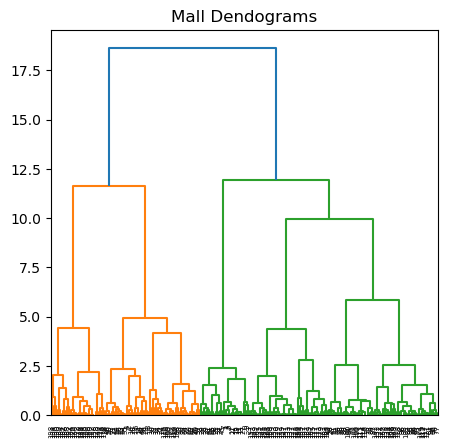

In [10]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.title("Mall Dendograms")
dend = shc.dendrogram(shc.linkage(pca_df, method='ward'))

In [11]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
cluster.fit_predict(scaled_mall_df)
np.unique(cluster.labels_)

array([0, 1], dtype=int64)

In [12]:
pca_df['cluster'] = cluster.labels_

<Axes: xlabel='pca1', ylabel='pca2'>

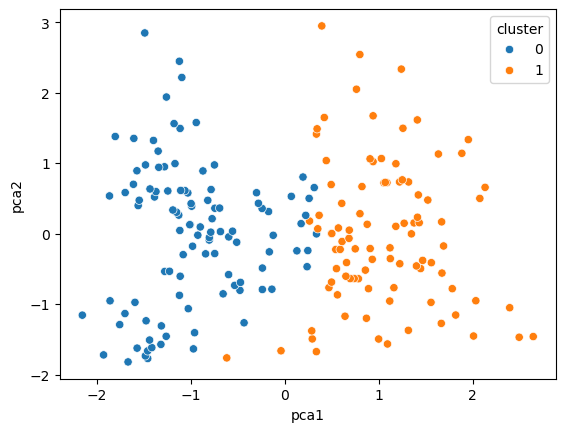

In [13]:
import seaborn as sns

sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=pca_df)

In [14]:
mall_df['cluster'] = pca_df.cluster
mall_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,1
197,198,Male,32,126,74,0
198,199,Male,32,137,18,1


<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

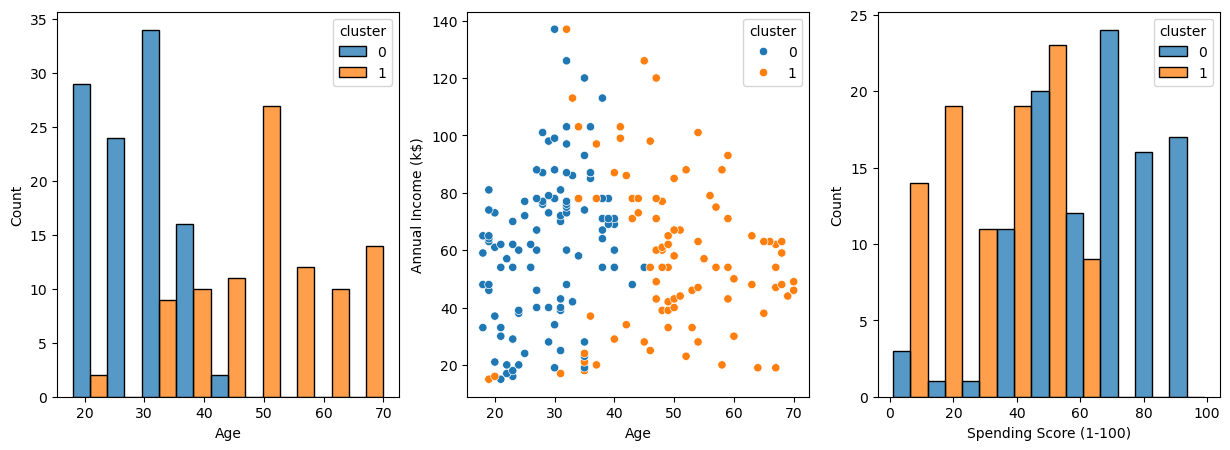

In [15]:
fit, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(x='Age', hue='cluster', data=mall_df, multiple='dodge', ax=ax[0])
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='cluster', data=mall_df, ax=ax[1])
sns.histplot(x='Spending Score (1-100)', hue='cluster', data=mall_df, multiple='dodge', ax=ax[2])

##### 🚩결론: 20대~40대까지 연 소득에 상관없이 쇼핑센터 이용을 많이 하고, 40대부터는 쇼핑센터 이용이 감소한다.

In [16]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
import numpy as np
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

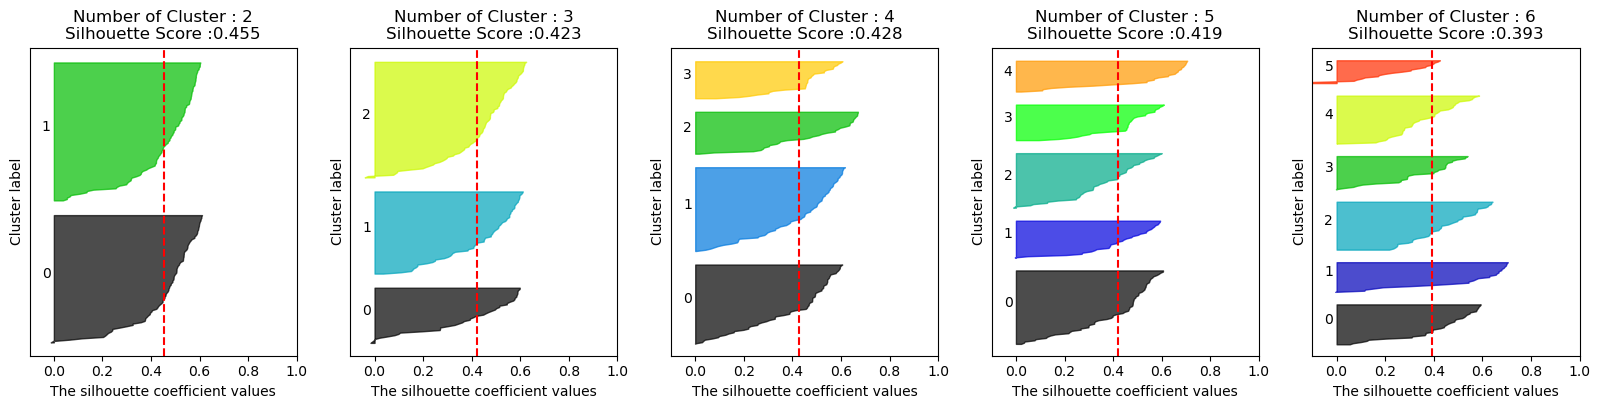

In [17]:
visualize_silhouette([2, 3, 4, 5, 6], pca_df)